In [249]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('results.csv')

In [250]:
# Assuming 'source' values should match against 'source' values and 'target' shows the actual prediction
confusion_matrix = pd.crosstab(data['source'], data['target'], rownames=['Actual'], colnames=['Predicted'])

# Ensure the matrix is square and includes all possible 'source' values as both rows and columns
all_labels = sorted(data['source'].unique())
confusion_matrix = confusion_matrix.reindex(index=all_labels, columns=all_labels, fill_value=0)
confusion_matrix

Predicted,1,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,101
Actual,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


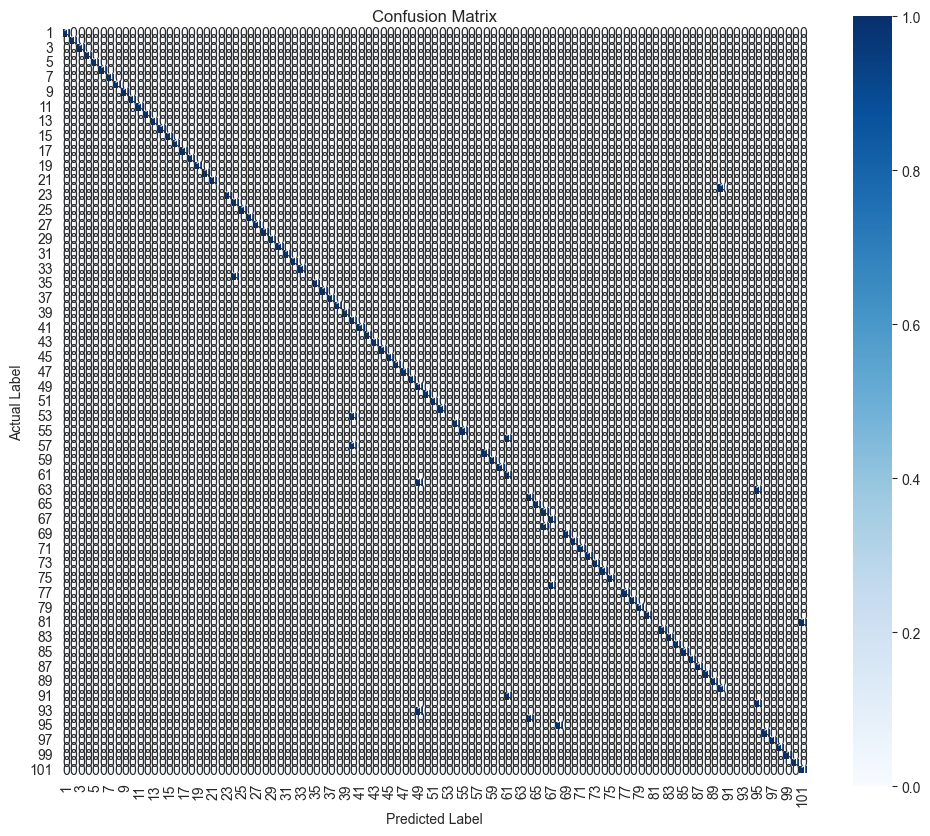

In [251]:
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap='Blues', cbar=True, square=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [252]:
# Assuming 'confusion_matrix' is already defined as shown previously
# Calculate the sum of the diagonal elements (true positives)
true_positives = np.trace(confusion_matrix)

# Calculate the total number of predictions
total_predictions = confusion_matrix.sum().sum()

# Compute accuracy
accuracy = true_positives / total_predictions

print(f"Accuracy: {accuracy:.2%}")

Accuracy: 85.15%


In [253]:
# Calculate total incorrect predictions for each predicted label
incorrect_predictions = confusion_matrix.sum(axis=0) - confusion_matrix.values.diagonal()

# Sort by most often incorrectly predicted labels
sorted_incorrect = incorrect_predictions.sort_values(ascending=False)

# Print results
print("Most Often Incorrectly Predicted Target Labels:")
for label, count in sorted_incorrect.items():
    if count > 0:
        print(f"Label {label}: {count} incorrect predictions")


Most Often Incorrectly Predicted Target Labels:
Label 49: 2 incorrect predictions
Label 95: 2 incorrect predictions
Label 61: 2 incorrect predictions
Label 40: 2 incorrect predictions
Label 101: 1 incorrect predictions
Label 66: 1 incorrect predictions
Label 24: 1 incorrect predictions
Label 68: 1 incorrect predictions
Label 90: 1 incorrect predictions
Label 67: 1 incorrect predictions
Label 64: 1 incorrect predictions
